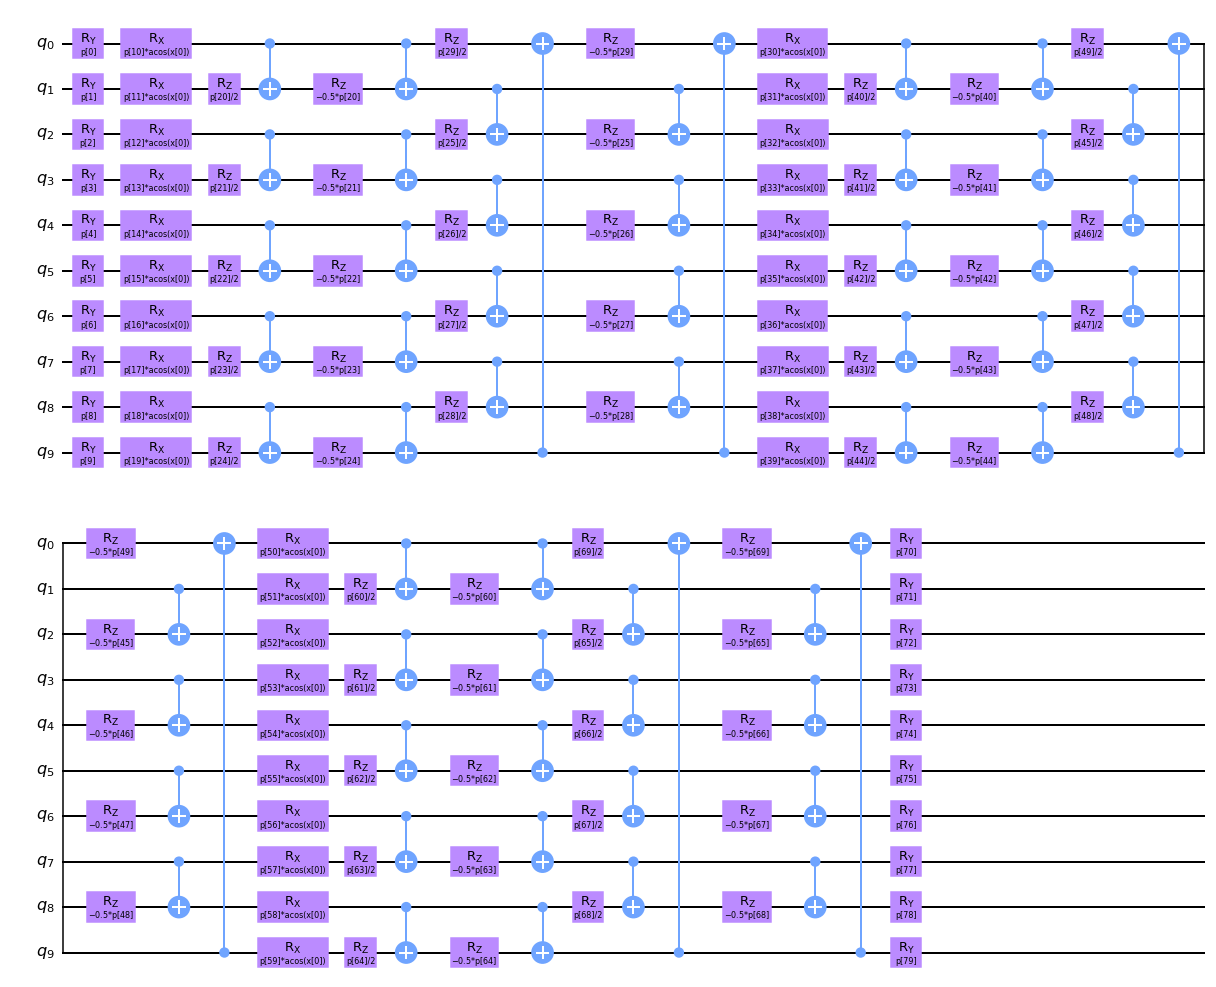

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector,ParameterExpression
from qiskit.primitives import Estimator,Sampler,BackendEstimator,BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit import transpile
from qiskit import Aer


from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SinglePauli,SummedPaulis
from squlearn.qnn.qnn import QNN
from squlearn.util import Executor

import copy

#from circuit_tree import *

from squlearn.util.optree import *
from squlearn.util.optree.optree import *
from squlearn.util.optree.optree_evaluate import *

num_qubits = 10

pqc = ChebPQC(num_qubits,1,3)

x = ParameterVector("x",pqc.num_features)
p = ParameterVector("p",pqc.num_parameters)

QC = pqc.get_circuit(x,p)



SUPPORTED_GATES = {"x", "y", "z", "h", "rx", "ry", "rz", "p", "u", "cx", "cy", "cz"} #rzz,ryy,rxx also work!
QC = transpile(QC,basis_gates=SUPPORTED_GATES)
QC.draw()

In [2]:
d = derivative(OpTreeLeafCircuit(QC),p)

In [3]:
grad = simplify_copy(d)
#grad = d

In [4]:
len(str(grad))

2021360

In [5]:
xval = [-0.5]
np.random.seed(0)
pval = np.random.rand(pqc.num_parameters)
dictionary = dict(zip(p, pval))
dictionary.update(dict(zip(x, xval)))


In [6]:
from pympler import asizeof
circ = get_first_leaf(grad)
full_size = asizeof.asizeof(circ)
print(f"Size of circuit: {full_size} bytes")


Size of circuit: 322784 bytes


In [7]:
op = SummedPaulis(num_qubits,"X")
pop = ParameterVector('p',op.num_parameters)
op_dict=dict(zip(pop,np.random.rand(op.num_parameters)))
pauli_op = op.get_pauli_new(pop)

In [8]:
op2 = SummedPaulis(num_qubits,"Y")
pop2 = ParameterVector('p',op.num_parameters)
op_dict2=dict(zip(pop2,np.random.rand(op.num_parameters)))
pauli_op2 = op.get_pauli_new(pop2)
print(pauli_op2)

SparsePauliOp(['IIIIIIIIII', 'IIIIIIIIIX', 'IIIIIIIIXI', 'IIIIIIIXII', 'IIIIIIXIII', 'IIIIIXIIII', 'IIIIXIIIII', 'IIIXIIIIII', 'IIXIIIIIII', 'IXIIIIIIII', 'XIIIIIIIII', 'IIIIIIIIIY', 'IIIIIIIIYI', 'IIIIIIIYII', 'IIIIIIYIII', 'IIIIIYIIII', 'IIIIYIIIII', 'IIIYIIIIII', 'IIYIIIIIII', 'IYIIIIIIII', 'YIIIIIIIII', 'IIIIIIIIIZ', 'IIIIIIIIZI', 'IIIIIIIZII', 'IIIIIIZIII', 'IIIIIZIIII', 'IIIIZIIIII', 'IIIZIIIIII', 'IIZIIIIIII', 'IZIIIIIIII', 'ZIIIIIIIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4]), ParameterExpression(1.0*p[5]),
 ParameterExpression(1.0*p[6]), ParameterExpression(1.0*p[7]),
 ParameterExpression(1.0*p[8]), ParameterExpression(1.0*p[9]),
 ParameterExpression(1.0*p[10]), ParameterExpression(1.0*p[11]),
 ParameterExpression(1.0*p[12]), ParameterExpression(1.0*p[13]),
 ParameterExpression(1.0*p[14]), ParameterExpression(1.0*p[15]),
 ParameterExpressio

In [9]:
print(op)

SummedOp([
  1.0*p[0] * IIIIIIIIII,
  1.0*p[1] * IIIIIIIIIX,
  1.0*p[2] * IIIIIIIIXI,
  1.0*p[3] * IIIIIIIXII,
  1.0*p[4] * IIIIIIXIII,
  1.0*p[5] * IIIIIXIIII,
  1.0*p[6] * IIIIXIIIII,
  1.0*p[7] * IIIXIIIIII,
  1.0*p[8] * IIXIIIIIII,
  1.0*p[9] * IXIIIIIIII,
  1.0*p[10] * XIIIIIIIII,
  1.0*p[11] * IIIIIIIIIY,
  1.0*p[12] * IIIIIIIIYI,
  1.0*p[13] * IIIIIIIYII,
  1.0*p[14] * IIIIIIYIII,
  1.0*p[15] * IIIIIYIIII,
  1.0*p[16] * IIIIYIIIII,
  1.0*p[17] * IIIYIIIIII,
  1.0*p[18] * IIYIIIIIII,
  1.0*p[19] * IYIIIIIIII,
  1.0*p[20] * YIIIIIIIII,
  1.0*p[21] * IIIIIIIIIZ,
  1.0*p[22] * IIIIIIIIZI,
  1.0*p[23] * IIIIIIIZII,
  1.0*p[24] * IIIIIIZIII,
  1.0*p[25] * IIIIIZIIII,
  1.0*p[26] * IIIIZIIIII,
  1.0*p[27] * IIIZIIIIII,
  1.0*p[28] * IIZIIIIIII,
  1.0*p[29] * IZIIIIIIII,
  1.0*p[30] * ZIIIIIIIII
])


In [10]:
evaluate_estimator(grad,pauli_op,dictionary,op_dict,Estimator(),detect_circuit_duplicates=False)

pre-processing 0.019953489303588867
run time 4.3470563888549805
post processing 0.0019981861114501953


array([ 3.18336427e-01, -4.20543975e-02, -2.08149149e-01,  4.01506793e-01,
        1.33428829e-01,  6.48361098e-01,  3.29433825e-01,  3.92673907e-01,
        6.37767141e-01,  5.01801050e-01,  1.53157308e+00,  8.64966170e-01,
        2.84108651e+00,  2.58837169e-01, -5.00132898e-01, -8.22633735e-01,
       -1.52793625e-01,  1.40040259e+00,  8.67289394e-01,  1.09624817e+00,
       -1.39424040e-01,  1.70255150e-02, -4.94599115e-02,  1.95444981e-02,
        4.16344422e-01, -2.05587126e-01, -9.31507432e-02, -1.98523925e-01,
        2.56856396e-01,  2.85861484e-01,  1.19829485e+00,  2.71825083e-01,
        1.78093582e+00,  5.47014234e-01, -5.31368053e-01, -3.37039250e-01,
       -3.03895871e-01,  7.94099165e-01,  4.91273709e-02,  8.50068180e-01,
        5.08727145e-01,  3.88216551e-01,  5.23802621e-02,  3.52555910e-01,
        1.24409952e-01,  4.20543749e-01,  7.57939904e-04, -1.99089690e-02,
        3.62077877e-01,  5.90597257e-01,  8.82502745e-01,  3.12505981e-01,
        2.65556502e-01,  

In [11]:
#evaluate_sampler(grad,pauli_op,dictionary,op_dict,Sampler(),detect_circuit_duplicates=False)

In [12]:
#estimator_qasm = BackendEstimator(Aer.get_backend('qasm_simulator'),options={'shots':10000})
#sampler_qasm = BackendSampler(Aer.get_backend('qasm_simulator'),options={'shots':10000})

In [13]:
#evaluate_estimator(grad,pauli_op,dictionary,op_dict,estimator_qasm,detect_circuit_duplicates=False)

In [14]:
#evaluate_estimator(grad,pauli_op,dictionary,op_dict,estimator_qasm,detect_circuit_duplicates=True)

In [15]:
# evaluate_sampler(grad,pauli_op,dictionary,op_dict,sampler_qasm,detect_circuit_duplicates=False)

In [16]:
total_dic = dictionary
total_dic.update(op_dict)

In [17]:
expec_tree = gen_expectation_tree(grad,pauli_op)

In [18]:
total_dic2 = total_dic.copy()
total_dic2[pop[0]]=-1
total_dic2[pop[1]]=2
total_dic2[x[0]]=-0.2
evaluate_expectation_tree_from_estimator(expec_tree,total_dic2,Estimator())

post processing 4.008080005645752
estimator_result [ 0.02313727 -3.40052002 -1.23275893 -1.74573095 -1.22948277 -2.10651989
 -1.54198656 -2.33221315 -1.70885354 -1.90558616 -1.11152376 -2.1793266
 -0.98308265 -1.64005788 -1.37333499 -3.00524535 -1.58433378 -3.18108285
 -1.75277952 -2.90444331 -0.83128654 -1.21572804 -0.59500839 -2.60661469
 -0.29794035 -2.87015152 -1.63454034 -1.94681059 -2.00896066 -1.61177718
 -2.04679183 -1.01959428 -1.5214569  -1.11255322 -1.13373263 -2.27129483
 -1.61126541 -1.94902855 -1.24415829 -2.93382279 -2.43488205 -1.81396743
 -1.00216621 -2.08304278 -1.52677321 -2.32823575 -1.85900538 -2.16502959
 -1.60145253 -2.53070855 -1.44823312 -2.54727315 -1.50102099 -2.99145455
 -1.53499204 -2.92682675 -1.7873531  -2.91876785 -2.70021443 -2.44767758
 -2.48327607 -2.27792108 -2.30300933 -2.18752638 -1.91121059 -2.1136091
 -1.50807862 -2.18344278 -1.92293553 -2.13764721 -1.51705736 -2.60546967
 -1.68649648 -3.16129145 -2.73938772 -2.82442554 -0.08059617 -3.41695614
 -

array([ 1.71182864,  0.25648601,  0.43851856,  0.3951133 ,  0.09836631,
        0.53390142,  0.32848761,  0.81595518,  0.79837454,  0.5758319 ,
        0.34064482,  1.78243833,  2.27917747,  0.27669553, -0.35193519,
       -0.91017625, -0.3623202 ,  1.00796785,  0.29928419,  1.49717306,
       -0.4254478 ,  0.12385958, -0.042446  ,  0.02464971,  0.3459879 ,
       -0.02246801, -0.11824141, -0.21842516,  0.34743929,  0.92959324,
        0.21880499,  0.41411596,  1.52029081,  0.250987  , -0.38244554,
       -0.57335334, -0.49414296,  0.54446526, -0.21172083,  0.81784617,
        0.66510889,  0.53124795,  0.03028559,  0.31490265,  0.32625203,
        0.57734745, -0.05648218, -0.10161342,  0.37649423,  1.7346119 ,
        0.28583774,  0.06980996,  0.42209951,  0.34722007, -0.5351983 ,
       -0.6635463 , -0.59432427,  0.6541502 ,  0.79769831,  1.15759393,
        0.3299956 ,  0.43609274,  0.09032527,  0.50032139, -0.12301693,
        0.49437087, -0.03753744,  0.16622043, -0.55344793,  0.59

In [19]:
evaluate_expectation_tree_from_estimator(expec_tree,[total_dic,total_dic2],Estimator())

post processing 7.7205491065979
estimator_result [ 1.01710266  0.38042981  0.9043828   0.9884916   0.54012008  0.95641838
  1.22621995  0.42320637  1.10862431  0.84176665  1.87273111  0.57600891
  1.84020768  1.18134003  0.82131642  0.03596861  0.86142448 -0.4141098
  0.84471151 -0.15889059  1.59650671  0.13396215  1.27127204  0.44529019
  2.02094368 -0.69209409  1.11690439  0.8697331   0.75507902  1.23267076
  0.98580946  1.77136681  1.43481088  1.58071804  1.50793385  0.17064788
  1.3184915   0.49029114  1.10298316  0.05614327  0.56985767  0.96559438
  0.97432302  0.81236356  1.24146313  0.4382847   0.92115472  0.18607834
  1.13391429  0.31631621  1.30048778  0.28505005  1.07004092  0.01112332
  1.03981931  0.05907969  1.02055948 -0.0565395  -0.13577576  0.45250294
 -0.2431496   0.83771908  0.29747436  0.55599454  0.93693568  0.68438242
  1.22387124  0.59871501  0.84527716  0.74918606  1.16905469  0.2788679
  0.919415   -0.42416912 -0.04413254 -0.36029108  1.11792025  0.40562394
  0.

array([[ 3.18336427e-01, -4.20543975e-02, -2.08149149e-01,
         4.01506793e-01,  1.33428829e-01,  6.48361098e-01,
         3.29433825e-01,  3.92673907e-01,  6.37767141e-01,
         5.01801050e-01,  1.53157308e+00,  8.64966170e-01,
         2.84108651e+00,  2.58837169e-01, -5.00132898e-01,
        -8.22633735e-01, -1.52793625e-01,  1.40040259e+00,
         8.67289394e-01,  1.09624817e+00, -1.39424040e-01,
         1.70255150e-02, -4.94599115e-02,  1.95444981e-02,
         4.16344422e-01, -2.05587126e-01, -9.31507432e-02,
        -1.98523925e-01,  2.56856396e-01,  2.85861484e-01,
         1.19829485e+00,  2.71825083e-01,  1.78093582e+00,
         5.47014234e-01, -5.31368053e-01, -3.37039250e-01,
        -3.03895871e-01,  7.94099165e-01,  4.91273709e-02,
         8.50068180e-01,  5.08727145e-01,  3.88216551e-01,
         5.23802621e-02,  3.52555910e-01,  1.24409952e-01,
         4.20543749e-01,  7.57939904e-04, -1.99089690e-02,
         3.62077877e-01,  5.90597257e-01,  8.82502745e-0

In [29]:
expec_tree = gen_expectation_tree(grad,OpTreeNodeList([pauli_op,pauli_op2]))
print(expec_tree)

[1.0*(0.5*[1.0*
     ┌────────────────┐┌──────────────────────┐                    »
q_0: ┤ Ry(p[0] + π/2) ├┤ Rx(p[10]*acos(x[0])) ├─────────────────■──»
     └──┬──────────┬──┘├──────────────────────┤┌─────────────┐┌─┴─┐»
q_1: ───┤ Ry(p[1]) ├───┤ Rx(p[11]*acos(x[0])) ├┤ Rz(p[20]/2) ├┤ X ├»
        ├──────────┤   ├──────────────────────┤└─────────────┘└───┘»
q_2: ───┤ Ry(p[2]) ├───┤ Rx(p[12]*acos(x[0])) ├─────────────────■──»
        ├──────────┤   ├──────────────────────┤┌─────────────┐┌─┴─┐»
q_3: ───┤ Ry(p[3]) ├───┤ Rx(p[13]*acos(x[0])) ├┤ Rz(p[21]/2) ├┤ X ├»
        ├──────────┤   ├──────────────────────┤└─────────────┘└───┘»
q_4: ───┤ Ry(p[4]) ├───┤ Rx(p[14]*acos(x[0])) ├─────────────────■──»
        ├──────────┤   ├──────────────────────┤┌─────────────┐┌─┴─┐»
q_5: ───┤ Ry(p[5]) ├───┤ Rx(p[15]*acos(x[0])) ├┤ Rz(p[22]/2) ├┤ X ├»
        ├──────────┤   ├──────────────────────┤└─────────────┘└───┘»
q_6: ───┤ Ry(p[6]) ├───┤ Rx(p[16]*acos(x[0])) ├─────────────────■──»
        ├─────────

In [21]:
expec_tree = transform_tree_to_zbasis(expec_tree)

In [22]:
evaluate_expectation_tree_from_sampler(expec_tree,[total_dic,total_dic2],Sampler())

build_lists_and_index_tree 11.655417919158936
build_lists_and_index_tree 11.7831552028656
run time 44.48856449127197
evaluate_expectation_from_sampler 11.387165069580078
evaluate_index_tree 0.004984617233276367
expec [ 2.49004914e+00  6.14616420e-01 -2.08756289e+00 ...  7.18801419e-01
  1.52884159e-03 -2.08273993e+00]


array([[ 3.18336427e-01, -4.20543975e-02, -2.08149149e-01,
         4.01506793e-01,  1.33428829e-01,  6.48361098e-01,
         3.29433825e-01,  3.92673907e-01,  6.37767141e-01,
         5.01801050e-01,  1.53157308e+00,  8.64966170e-01,
         2.84108651e+00,  2.58837169e-01, -5.00132898e-01,
        -8.22633735e-01, -1.52793625e-01,  1.40040259e+00,
         8.67289394e-01,  1.09624817e+00, -1.39424040e-01,
         1.70255150e-02, -4.94599115e-02,  1.95444981e-02,
         4.16344422e-01, -2.05587126e-01, -9.31507432e-02,
        -1.98523925e-01,  2.56856396e-01,  2.85861484e-01,
         1.19829485e+00,  2.71825083e-01,  1.78093582e+00,
         5.47014234e-01, -5.31368053e-01, -3.37039250e-01,
        -3.03895871e-01,  7.94099165e-01,  4.91273709e-02,
         8.50068180e-01,  5.08727145e-01,  3.88216551e-01,
         5.23802621e-02,  3.52555910e-01,  1.24409952e-01,
         4.20543749e-01,  7.57939904e-04, -1.99089690e-02,
         3.62077877e-01,  5.90597257e-01,  8.82502745e-0

In [23]:
evaluate_expectation_tree_from_sampler(expec_tree,total_dic,Sampler())

build_lists_and_index_tree 11.599153518676758
run time 26.264126300811768
evaluate_expectation_from_sampler 5.534063816070557
evaluate_index_tree 0.0019996166229248047
expec [ 2.49004914  0.61461642 -2.08756289  1.74911414  0.62256455 -1.99124888
  2.03015155  0.58249392 -1.70826267  2.07504374  0.89558324 -1.98213538
  2.24498053  0.0559112  -1.76077166  1.44065832  1.08692585 -1.57116579
  2.28076756  0.86825791 -1.92280552  1.50059904  0.89512208 -1.97251475
  1.96687613  1.53274657 -2.39099839  1.88248239  0.99120595 -2.03192169
  2.20027311  1.64296595 -1.97050796  1.5032378   0.8887776  -1.8160065
  2.48366592  0.74093444 -1.38439269  2.11214395  0.86477686 -1.79558079
  2.48566132  0.57520667 -2.23955157  1.34487123  0.88846784 -2.19737046
  2.64084924  0.71771133 -2.49713609  1.01667948  1.09980634 -2.53059562
  2.40060369  0.54307414 -2.09896633  1.79926525  0.29478994 -2.25294579
  2.29947726  1.23492689 -1.93789743  2.27134772  0.14505033 -2.2824359
  2.33039184  0.59163599 

array([ 3.18336427e-01, -4.20543975e-02, -2.08149149e-01,  4.01506793e-01,
        1.33428829e-01,  6.48361098e-01,  3.29433825e-01,  3.92673907e-01,
        6.37767141e-01,  5.01801050e-01,  1.53157308e+00,  8.64966170e-01,
        2.84108651e+00,  2.58837169e-01, -5.00132898e-01, -8.22633735e-01,
       -1.52793625e-01,  1.40040259e+00,  8.67289394e-01,  1.09624817e+00,
       -1.39424040e-01,  1.70255150e-02, -4.94599115e-02,  1.95444981e-02,
        4.16344422e-01, -2.05587126e-01, -9.31507432e-02, -1.98523925e-01,
        2.56856396e-01,  2.85861484e-01,  1.19829485e+00,  2.71825083e-01,
        1.78093582e+00,  5.47014234e-01, -5.31368053e-01, -3.37039250e-01,
       -3.03895871e-01,  7.94099165e-01,  4.91273709e-02,  8.50068180e-01,
        5.08727145e-01,  3.88216551e-01,  5.23802621e-02,  3.52555910e-01,
        1.24409952e-01,  4.20543749e-01,  7.57939904e-04, -1.99089690e-02,
        3.62077877e-01,  5.90597257e-01,  8.82502745e-01,  3.12505981e-01,
        2.65556502e-01,  

In [24]:
expec_tree2 = gen_expectation_tree(grad,pauli_op2)

In [25]:
expec_tree2 = transform_tree_to_zbasis(expec_tree2)

In [26]:
total_dic2 = dictionary
total_dic2.update(op_dict2)

In [27]:
evaluate_expectation_tree_from_sampler(expec_tree2,total_dic2,Sampler())

build_lists_and_index_tree 12.225189447402954
run time 25.10632085800171
evaluate_expectation_from_sampler 5.632073163986206
evaluate_index_tree 0.0019979476928710938
expec [ 4.32123268  0.82405797 -2.04160727  3.06461827  0.8928052  -2.00078515
  3.64054078  0.63317297 -1.93755607  3.42314497  1.31238727 -1.98315205
  3.79877921  0.53730349 -1.80559027  2.89764463  1.43560458 -1.7189461
  3.6405134   1.16470368 -1.45573279  3.24752153  1.24891332 -1.66472046
  3.03803767  1.69216003 -2.20326485  2.93851444  1.40424581 -1.89061077
  3.75810334  1.49831324 -1.84321774  2.9576703   1.2396049  -1.66755786
  4.54795036  1.51424765 -1.06607207  2.8459885   1.39380762 -1.59396464
  3.91702141  0.99784315 -1.8602076   2.83220645  1.22622646 -2.11149341
  4.11806974  0.55070089 -2.38641538  2.78226977  1.03080295 -2.39426379
  3.98923891  0.90276767 -2.05713579  3.18631057  0.82551474 -2.15692417
  4.05605897  1.60472178 -1.98123124  3.90046156  0.29700753 -2.12939248
  4.05540203  1.14998412 

array([ 5.73522526e-01, -2.08111255e-01, -4.19053436e-02,  2.58884953e-01,
        3.73916857e-02,  4.41740758e-01,  1.17514723e+00,  5.53858732e-01,
        4.31773157e-01,  4.89984824e-01,  1.68753048e+00,  1.51345851e+00,
        2.08732792e+00,  1.05378434e+00, -4.22419600e-01, -1.03671580e+00,
        6.65007844e-01,  6.18078312e-01,  9.47171937e-01,  5.62960261e-01,
       -4.69967700e-01,  1.03016502e-01, -2.39121261e-02, -5.53240041e-02,
        4.01956031e-01, -1.41707819e-01, -6.99598130e-02, -2.52928701e-01,
        2.10937487e-01,  4.07827877e-01,  1.56079610e+00,  6.76460149e-01,
        1.33255751e+00,  1.02931572e+00, -4.09315341e-01, -5.79692781e-01,
        3.28337922e-01,  1.83580768e-01,  3.31187068e-02,  2.68580081e-01,
        7.12406154e-01,  5.76829701e-01, -1.60202567e-03,  4.84606385e-01,
        8.72872711e-02,  4.69177990e-01, -1.36926577e-01,  4.94006945e-01,
        3.76506833e-01,  7.98237743e-01,  1.16929671e+00,  3.07072626e-01,
        2.09444286e-01,  